In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("global_co2.csv")
data.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [12]:
from sklearn.model_selection import train_test_split


data_cleaned = data[['Year', 'Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring', 'Per Capita']].dropna()

X = data_cleaned[['Year', 'Total', 'Gas Fuel', 'Liquid Fuel', 'Solid Fuel', 'Cement', 'Gas Flaring']]
y = data_cleaned['Per Capita']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((48, 7), (13, 7), (48,), (13,))

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


linear_regressor = LinearRegression()


linear_regressor.fit(X_train, y_train)


y_pred_linear = linear_regressor.predict(X_test)


mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


(mae_linear, mse_linear, r2_linear)


(0.016866747178880363, 0.00037865376348531854, 0.9890976410608868)

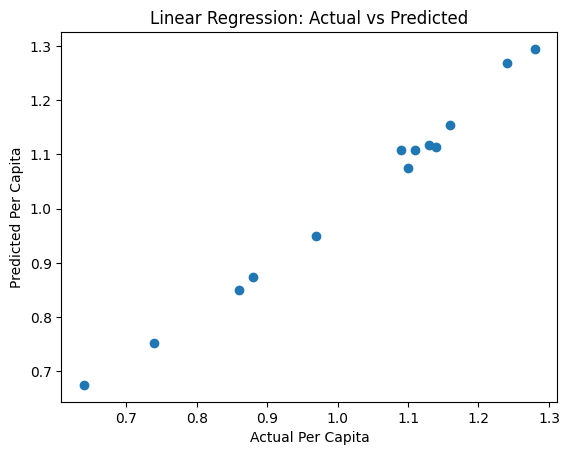

In [15]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Per Capita')
plt.ylabel('Predicted Per Capita')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


poly_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())


poly_regressor.fit(X_train, y_train)


y_pred_poly = poly_regressor.predict(X_test)


mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression - MAE: {mae_poly}, MSE: {mse_poly}, R2: {r2_poly}')

Polynomial Regression - MAE: 0.008454186181507582, MSE: 9.23836466406394e-05, R2: 0.9973400510627184


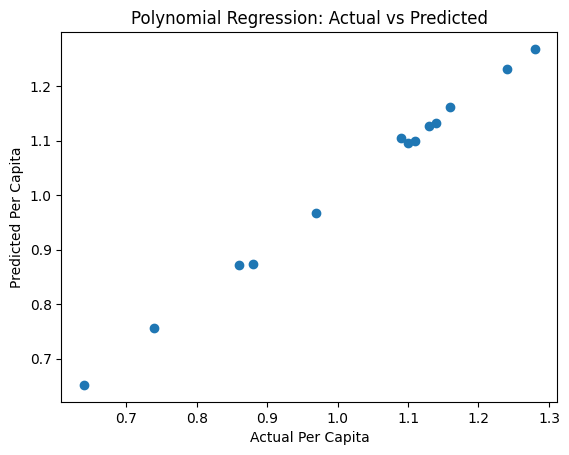

In [17]:
plt.scatter(y_test, y_pred_poly)
plt.xlabel('Actual Per Capita')
plt.ylabel('Predicted Per Capita')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()

In [18]:
from sklearn.tree import DecisionTreeRegressor


tree_regressor = DecisionTreeRegressor(random_state=42)


tree_regressor.fit(X_train, y_train)

y_pred_tree = tree_regressor.predict(X_test)


mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree Regression - MAE: {mae_tree}, MSE: {mse_tree}, R2: {r2_tree}')

Decision Tree Regression - MAE: 0.019230769230769232, MSE: 0.0005769230769230769, R2: 0.9833889873245195


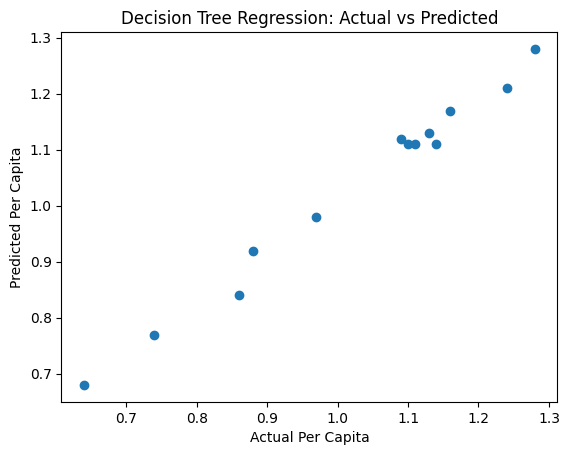

In [19]:
plt.scatter(y_test, y_pred_tree)
plt.xlabel('Actual Per Capita')
plt.ylabel('Predicted Per Capita')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor.fit(X_train, y_train)


y_pred_forest = forest_regressor.predict(X_test)

mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest Regression - MAE: {mae_forest}, MSE: {mse_forest}, R2: {r2_forest}')

Random Forest Regression - MAE: 0.012615384615384414, MSE: 0.0003605199999999932, R2: 0.9896197560310755


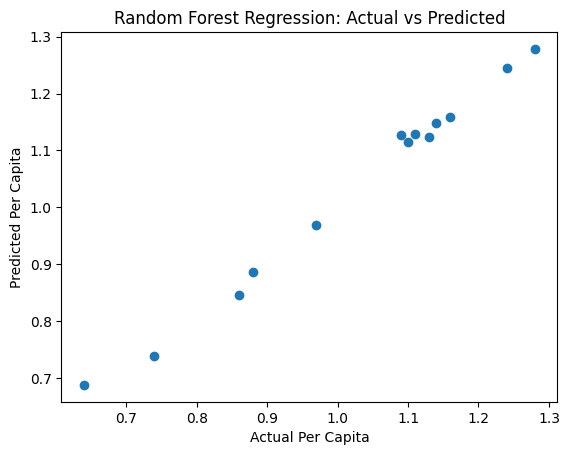

In [21]:
plt.scatter(y_test, y_pred_forest)
plt.xlabel('Actual Per Capita')
plt.ylabel('Predicted Per Capita')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_regressor = SVR(kernel='rbf')

svr_regressor.fit(X_train_scaled, y_train)

y_pred_svr = svr_regressor.predict(X_test_scaled)


mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR - MAE: {mae_svr}, MSE: {mse_svr}, R2: {r2_svr}')

SVR - MAE: 0.04471787804577254, MSE: 0.003223430644083351, R2: 0.907189624701839


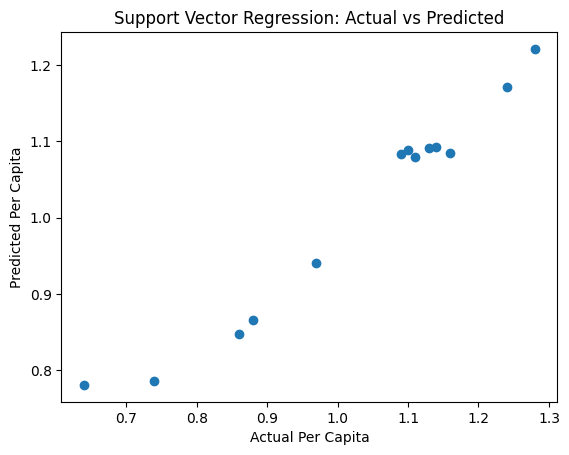

In [23]:
plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Per Capita')
plt.ylabel('Predicted Per Capita')
plt.title('Support Vector Regression: Actual vs Predicted')
plt.show()

In [25]:
print(f'Linear Regression - MAE: {mae_linear}, MSE: {mse_linear}, R2: {r2_linear}')
print(f'Polynomial Regression - MAE: {mae_poly}, MSE: {mse_poly}, R2: {r2_poly}')
print(f'Decision Tree Regression - MAE: {mae_tree}, MSE: {mse_tree}, R2: {r2_tree}')
print(f'Random Forest Regression - MAE: {mae_forest}, MSE: {mse_forest}, R2: {r2_forest}')
print(f'SVR - MAE: {mae_svr}, MSE: {mse_svr}, R2: {r2_svr}')

best_model = 'Polynomial Regression'
print(f'The best model is: {best_model}')


Linear Regression - MAE: 0.016866747178880363, MSE: 0.00037865376348531854, R2: 0.9890976410608868
Polynomial Regression - MAE: 0.008454186181507582, MSE: 9.23836466406394e-05, R2: 0.9973400510627184
Decision Tree Regression - MAE: 0.019230769230769232, MSE: 0.0005769230769230769, R2: 0.9833889873245195
Random Forest Regression - MAE: 0.012615384615384414, MSE: 0.0003605199999999932, R2: 0.9896197560310755
SVR - MAE: 0.04471787804577254, MSE: 0.003223430644083351, R2: 0.907189624701839
The best model is: Polynomial Regression
